In [1]:
import h5py as h5 
from p_tqdm import p_imap,p_map
import numpy as np
import pandas as pd

import os,re,glob
__LOC__ = './data/'

def mkdir(loc):
    try:os.mkdir(loc)
    except FileExistsError: None
    
mkdir(__LOC__)
f = h5.File('test.h5', 'r')

In [76]:
cols = f.attrs['order'].split(',')
cols

['indicators', 'geocd', 'values']

In [3]:
indi = eval(f.attrs['INDICATORS'])
geocd = eval(f.attrs['GEOCD'])


In [4]:
f['indicators'].shape,max(geocd.values()),max(indi.values())


((34753, 1501, 3), 34752, 1500)

In [5]:
## CSV and JSON

def gen_buff_itext(k):  
    j,i=k
    warn = False
    
    newpath_c = f'{__LOC__}indicator_csv/'
    newpath_j = f'{__LOC__}indicator_json/'
    
    data = f['indicators'][:,i,:]
    if np.any(data<0):
        warn = j
        data = np.where(data<-1, 0, data)
    
    data = pd.DataFrame(data)
    data.columns = cols
    data.to_csv(f'{newpath_c}{j}.csv')
    data.to_json(f'{newpath_j}{j}.json')
    
    
    
    
    return warn

In [6]:
# new indicator area
# for i,j in enumerate(indi):

# text = re.compile('\s+')

def gen_buff_ifirst(k):  
    j,i=k
    warn = False
    
    newpath = f'{__LOC__}indicator_first/'
    data = f['indicators'][:,i,:]
    if np.any(data<0):
        warn = j
        data = np.where(data<-1, 0, data)
    
    data = list(data.flatten()).__str__()
    
    #     print(f'node ./to_buffer {data} {newpath}{j}.buff ')
    os.system(f'node ./to_buffer "{data}" {newpath}{j}.buff')
    
    return warn

In [7]:
# old area indicator 


def gen_buff_lfirst(k):  
    j,i=k
    warn = False
    
    newpath = f'{__LOC__}location_first/'
    data = f['indicators'][i,:,:]
    if np.any(data<0):
        warn = j
        data = np.where(data<-1, 0, data)
    
    data = list(data.flatten()).__str__()
    
    os.system(f'node ./to_buffer "{data}" {newpath}{j}.buff')
    
    return warn

In [ ]:

if __name__ == '__main__':
    mkdir(f'{__LOC__}/indicator_first/')
    mkdir(f'{__LOC__}/location_first/')
    mkdir(f'{__LOC__}/indicator_csv/')
    mkdir(f'{__LOC__}/indicator_json/')
    
   ## intentionally not combigned functions as we will only use one     
        
    warnings = p_map(gen_buff_ifirst, list(indi.items()))
    
    warnings2 = p_map(gen_buff_lfirst, list(geocd.items()))
    
    warnings3 = p_map(gen_buff_itext, list(indi.items()))

In [ ]:
warnings

In [ ]:
'''
Note that the data produces some unexpected results, like percentages > 100 and negative numbers'''

In [8]:
    mkdir(f'{__LOC__}/indicator_first/')
    mkdir(f'{__LOC__}/location_first/')
    mkdir(f'{__LOC__}/indicator_csv/')
    mkdir(f'{__LOC__}/indicator_json/')

In [9]:
warnings3 = p_map(gen_buff_itext, list(indi.items()))

  0%|          | 0/1501 [00:00<?, ?it/s]

In [10]:
def readable(size):
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024.0:
            return "%3.1f %s" % (size, x)
        size /= 1024.0

    return size

In [75]:
folders = glob.glob('./data/*')
fdf = pd.DataFrame([])

compute = [1.5,2.29,33.2,1.6]
size = []
mean_fs = []
std_fs =[]
nfiles = []

for i in folders:
    print(i,readable(os.stat(i).st_size))
    
    
    
    allf = [os.stat(i).st_size for i in glob.glob(i+'/*')]
    size.append(readable(np.sum(allf)))
    mean_fs.append(readable(np.mean(allf)))
    std_fs.append(readable(np.std(allf)))
    nfiles.append(len(allf))
    
ddf = pd.DataFrame([compute,size,mean_fs,std_fs,nfiles],index = 'Computate ∆,∑ size,µ size,std size,# files'.split(','),columns='i_CSV,i_Uint,l_Uint,i_JSON'.split(',') )
ddf = ddf[sorted(ddf.columns)]
print(str(ddf.to_markdown()))
ddf

./data/indicator_csv 47.0 KB
./data/indicator_first 47.0 KB
./data/location_first 1.1 MB
./data/indicator_json 47.0 KB
|             | i_CSV    | i_JSON   | i_Uint    | l_Uint    |
|:------------|:---------|:---------|:----------|:----------|
| Computate ∆ | 1.5      | 1.6      | 2.29      | 33.2      |
| ∑ size      | 751.1 MB | 1.6 GB   | 298.5 MB  | 298.5 MB  |
| µ size      | 512.4 KB | 1.1 MB   | 203.6 KB  | 8.8 KB    |
| std size    | 40.4 KB  | 40.4 KB  | 0.0 bytes | 0.0 bytes |
| # files     | 1501     | 1501     | 1501      | 34753     |


,i_CSV,i_JSON,i_Uint,l_Uint
Computate ∆,1.5,1.6,2.29,33.2
∑ size,751.1 MB,1.6 GB,298.5 MB,298.5 MB
µ size,512.4 KB,1.1 MB,203.6 KB,8.8 KB
std size,40.4 KB,40.4 KB,0.0 bytes,0.0 bytes
# files,1501,1501,1501,34753


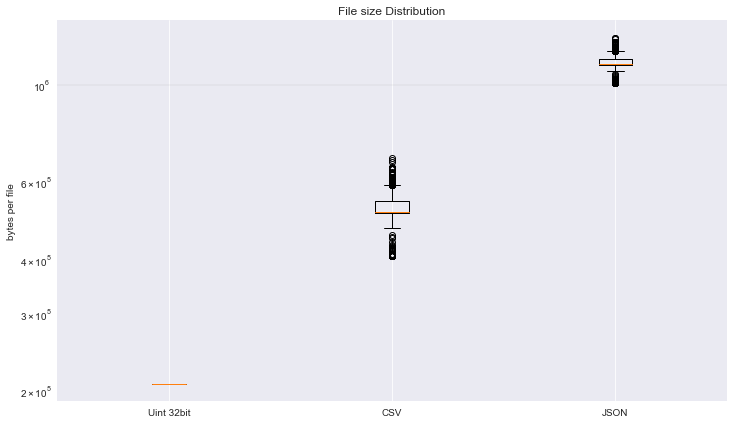

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 7))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Set plot title
ax.set_title('File size Distribution')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set species names as labels for the boxplot

# Set the colors for each distribution
colors = ['#73020C', '#426A8C', '#D94D1A']

ax.boxplot([os.stat(i).st_size for i in glob.glob('./data/indicator_first/*')], positions=[1], labels=['Uint 32bit'])
ax.boxplot([os.stat(i).st_size for i in glob.glob('./data/indicator_csv/*')], positions=[2], labels=['CSV'])
ax.boxplot([os.stat(i).st_size for i in glob.glob('./data/indicator_json/*')], positions=[3], labels=['JSON'])
ax.set_yscale('log')
plt.ylabel('bytes per file')

plt.show()


                  File Size (bytes)
0  UInt8 (32bit)             208518
1  UInt8 (32bit)             208518
2  UInt8 (32bit)             208518
3  UInt8 (32bit)             208518
4  UInt8 (32bit)             208518


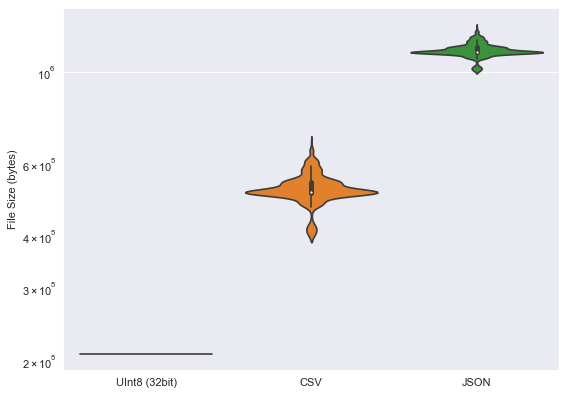

In [57]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
df1 = pd.DataFrame([os.stat(i).st_size for i in glob.glob('./data/indicator_first/*')])
df2 = pd.DataFrame([os.stat(i).st_size for i in glob.glob('./data/indicator_csv/*')])
df3 = pd.DataFrame([os.stat(i).st_size for i in glob.glob('./data/indicator_json/*')])



cdf = pd.concat([df1, df2, df3],axis=1)  
cdf.columns = ['UInt8 (32bit)','CSV','JSON']
# CONCATENATE
mdf = pd.melt(cdf, var_name=[''])      # MELT
mdf.columns=['','File Size (bytes)']
print(mdf.head())
plt.figure(figsize=(8, 6), dpi=80)

# ax = sns.boxplot(x="", y="File Size (bytes)", hue="", data=mdf,)  # RUN PLOT   
ax = sns.violinplot(data=cdf)    

ax.set_yscale('log')
plt.ylabel('File Size (bytes)')
plt.show()
plt.tight_layout()
plt.clf()
plt.close()